# 1.0 Project Overview
This project is about the Syrian Telecommunication company that was assessing the bevaiour of the customers to leave their services and move to another telecommunication company(competitor).This will mean customers will soon stop accessing their services such as calling,sms,etc and switch to another service provider.In this project therefore we will explore the available data to classify the customer into two classifiable predictions as: will soon stop using the telcos services and will retain the services of the the telcos.In the longrun we shall determine which features will contribute to the customer discontinuing(soon) services of Syriatel in favour of another telcomunication company.


### 1.1 Objetcives of the Project
1. Determine how long a customer will stay on the Syriatel services
2. Determinie the retention ration of customers by Syriatel
3. Determine possible strategies to retain customers on Syriatel

# 2.0 Business and Data Understanding

#### 2.1 Business Understanding
This project is about assessing why the Syriatel Telecom company is going to loose customers,very soon to anothr service provider within the industry.We shall therefore seek insight on why customers will leave Syriatel or for this matter any company within the industry to cross-over another network.We shall establish the customer trends across various services provided within the network and see what factors will lead the customer abandon the service of one company for the other.

In particular we shall seek to answer the following questions:

1. How long does it take the customers to stay with the Syriatel?

2. What is the rention ratio of customers by the Telcos?

3. What are the likely causes of customers to leave the Syriatel to another telcos?

4. What are the likely strategies to be deployed by the teclos to avoid soon losing customers?

5. What is the behaviour of the customer before soon leaving the Syriatel to another service customer?

### 2.2 Data Understanding
In this section we explore the data provided for this project applying Exploration Data Analysisis Techniques to determine how we shall utilise the data provided.

## 2.2.1 Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats

## 2.2.2 Import the provided data for the project

We shall load our csv file and see the characteristics of the data provided and identify the features required for this project.



In [10]:
data= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# 2.3 Data preparations 
In this section we shall undertake data preparation to enable us conduct Exploratory Data Analysis and Modelling by;

(a). Determine any missing values in the data set

(b). Identify any duplicated rows and columns

(c). Identify any irreleant columns that may not be needed to conduct any analysis and therefore thye are of no value to us in conducting this modelling for Machine Learning.This will be achieved by dropping such columns

In [29]:
# checking for missing values
data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing value in the data set

In [31]:
# Check for duplicates in the dataset
duplicates = data.duplicated().sum()
duplicates

0

No duplicates in the dataset

In [35]:
# Drop any irrelevant columns that will not be required or used in the analysis.In this case we shall drop the phone number column
data.drop(columns=['phone number'], inplace=True)
data.head(5)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 2.4 Conducting Exploratory Data Analysis
In this section we shall explore the data to see the type of data we are dealing with,establish some relationships and visualise the data.


In [ ]:
# checking the data types
data.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

The data contains both numeric data and categorical data:

1. Categorical data include; state,international plan and voice plan

2. Numeric data include; 
* number vmail message
* total day minutes        
* total day calls            
* total day charge          
* total eve minutes         
* total eve calls            
* total eve charge          
* total night minutes       
* total night calls           
* total night charge        
* total intl minutes       
* total intl calls            
* total intl charge         
* customer service calls 

3. We have data known as **churn** which is boolen in nature meaning that it either true or False.This may mean it will determine if the customer left the telcom company soon(Syriatel) or not.True will denote that the customer left the company and False will denote that the customer did not leave the service.

We can further analyise the churn data and create a list for numeric and categorical data as follows to enable us use the data better in our analysis going forward:

### (a) Creating numerical and categorical features or lists

In [37]:
# Creating a list of numeric features
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [38]:
# Creating a list of categorical  features
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features

['state', 'international plan', 'voice mail plan', 'churn']

We can further count the boolen entries in the categorical data churn as follows;

In [39]:
# counting the boolean values in the churn data as 1 and 0
data['churn'].value_counts() # 1 means churn or the customer left the telcom  and 0 means not churn or the customer is still with the telecom


churn
False    2850
True      483
Name: count, dtype: int64

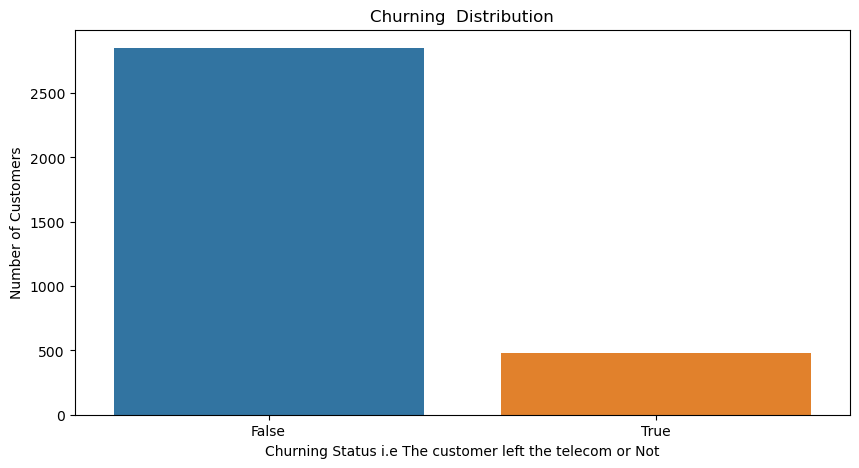

In [40]:
# Visualize the churned data on a histograph
plt.figure(figsize=(10, 5))
sns.countplot(x='churn', data=data);
plt.title('Churning  Distribution')
plt.xlabel('Churning Status i.e The customer left the telecom or Not')
plt.ylabel('Number of Customers')
plt.show()

From the above graph we can see that the data is imbalanced as the number of customers who churned is less than the number of customers who did not churn.i.e. the number of customers who left the telecom is less than the number of customers who are still with the telecom.

Those customers who left were 483 and those who remained were 2,850

In [41]:
# Identfying the unique values in the categorical features
for feature in categorical_features:
    print(f"{feature}: {data[feature].unique()}")


state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
international plan: ['no' 'yes']
voice mail plan: ['yes' 'no']
churn: [False  True]


In [42]:
# identifying the unique values in the numeric features
for feature in numeric_features:
    print(f"{feature}: {data[feature].unique()}")

account length: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
area code: [415 408 510]
number vmail messages: [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 4

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

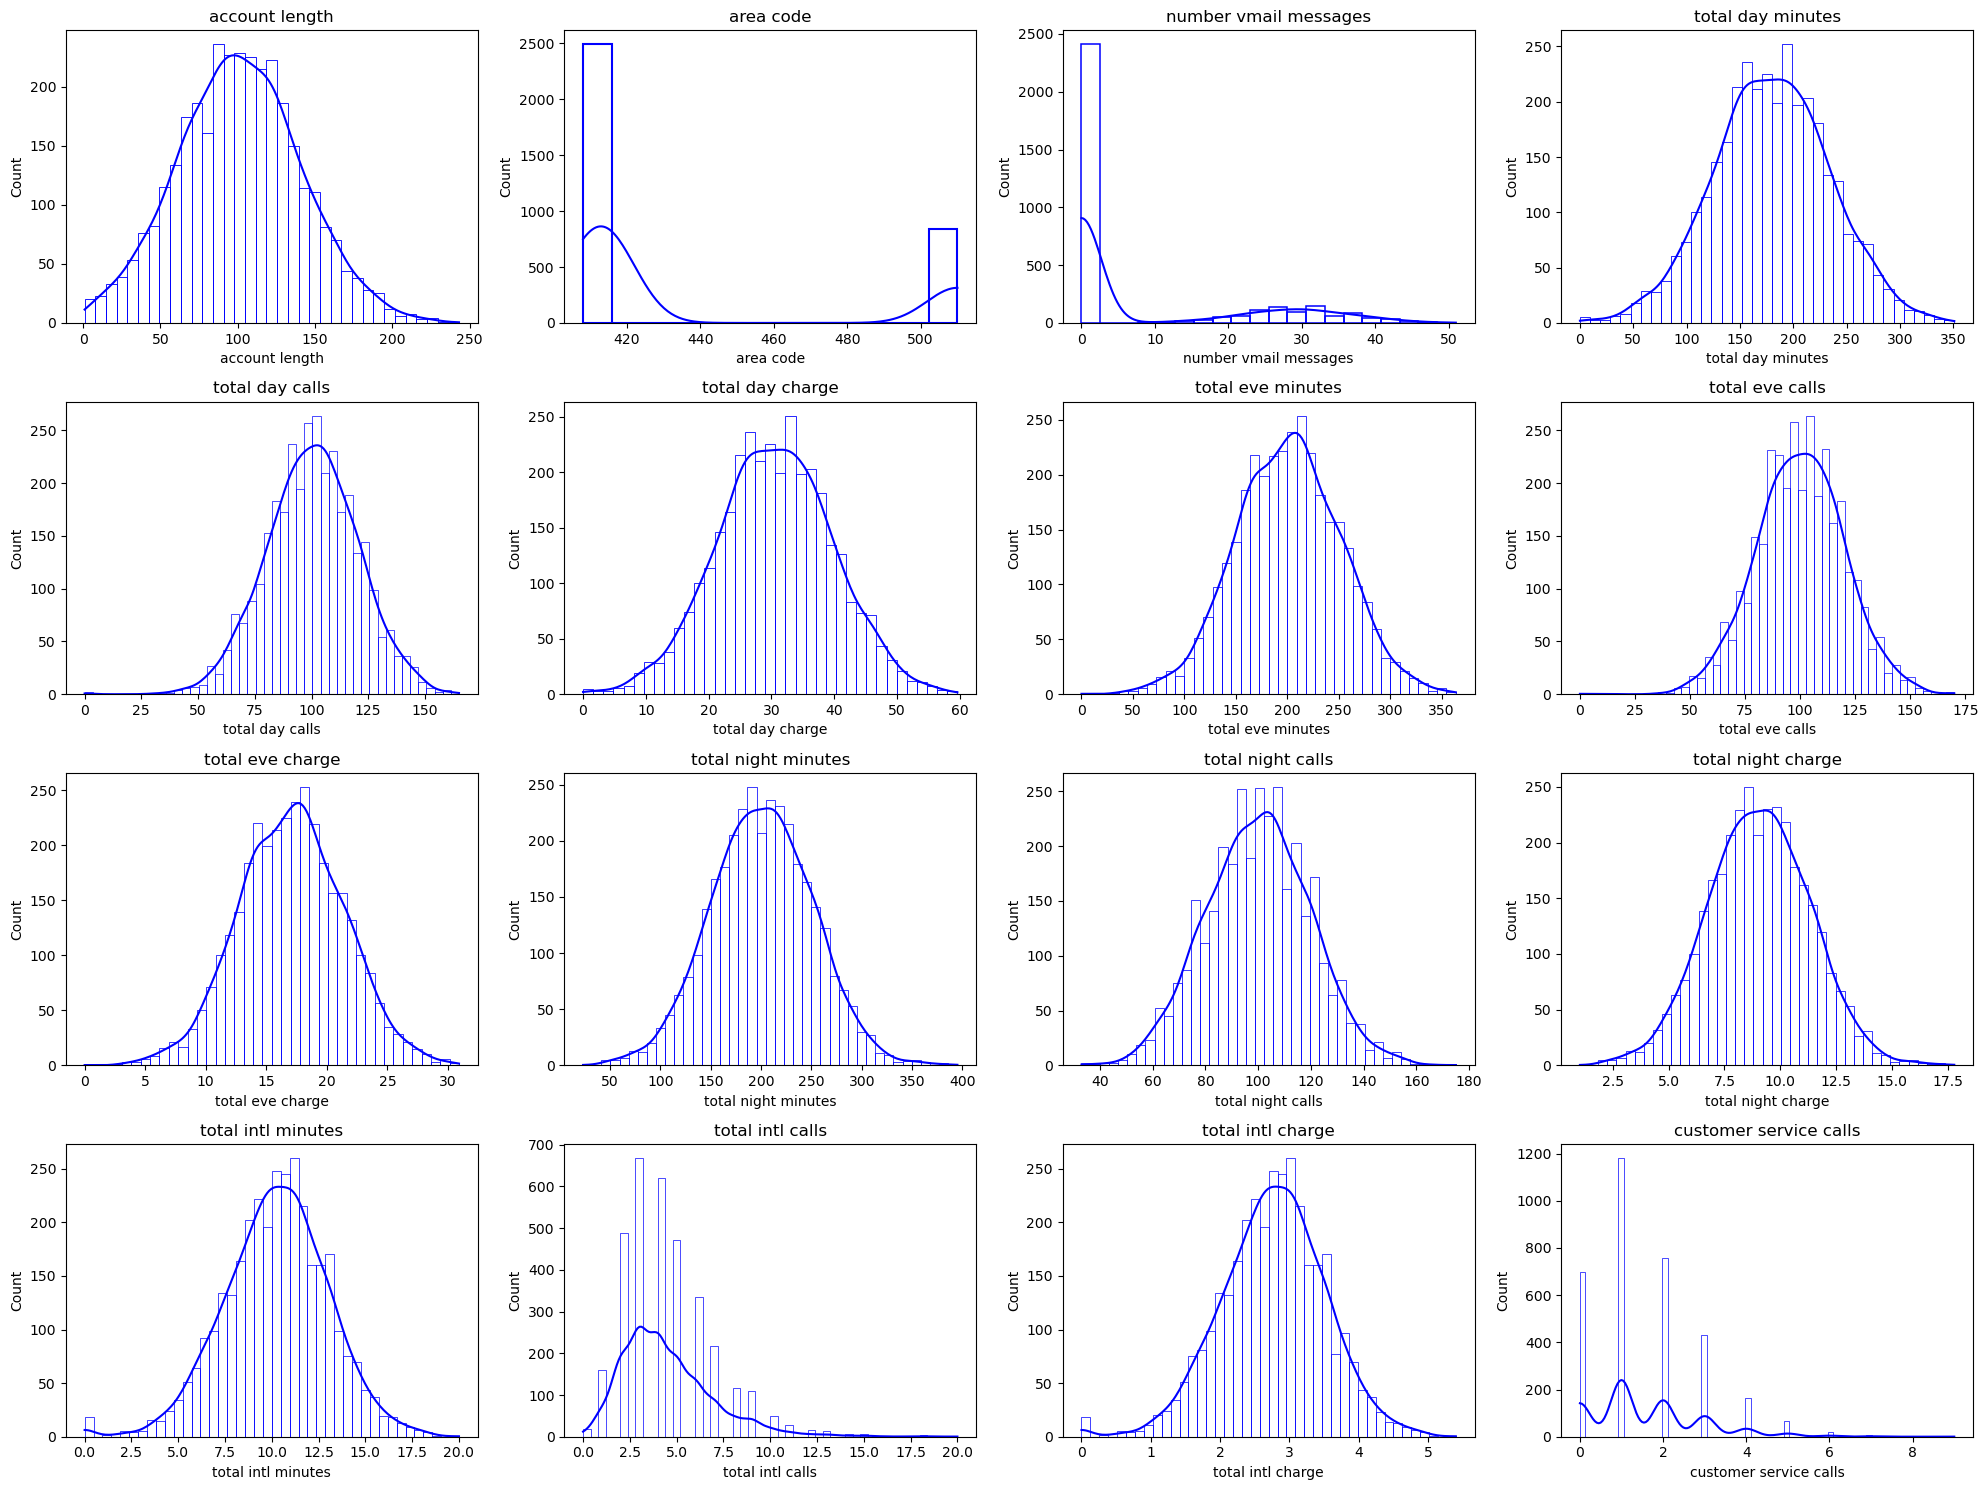

In [55]:

# checking the distribution of the numeric features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to a 4x4 grid to fit all 13 features
    sns.histplot(data[feature], kde=True, fill=False, color='blue')  # Replaced 'palette' with 'blue'
    plt.title(feature)
plt.tight_layout()
plt.show()

#The area code,number of voice mail messages and cusomers service calls are not normally distributed.This means that we will need to scale the numeric features before we can use them in our model

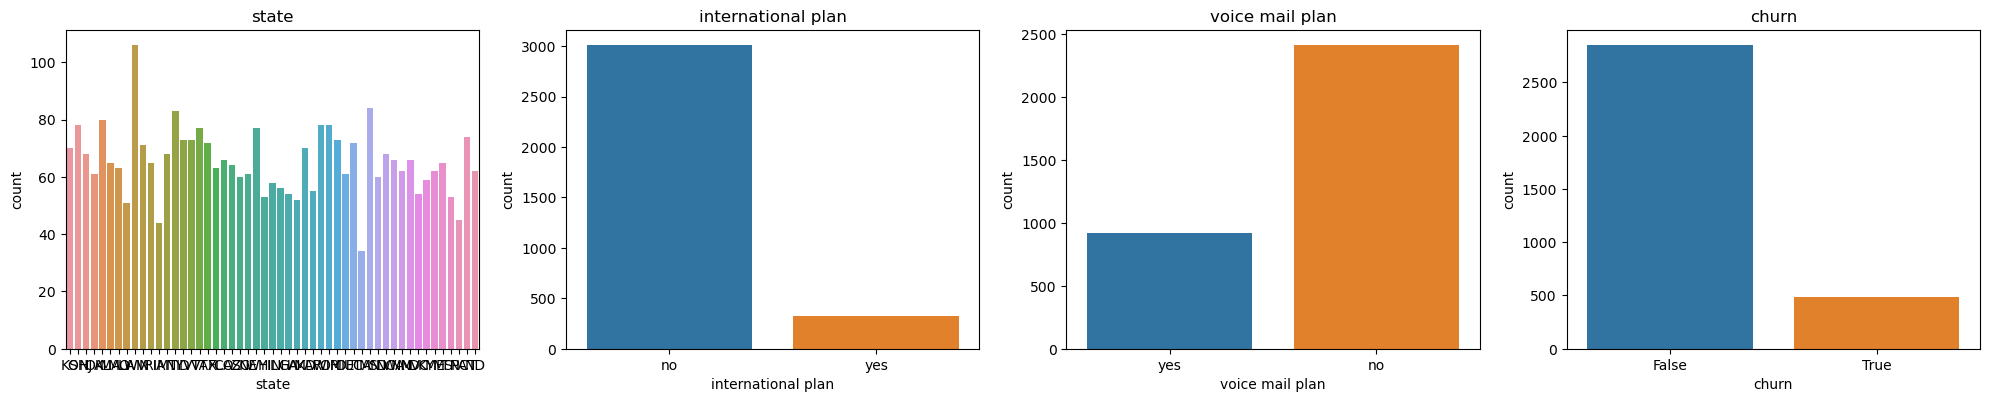

In [57]:
# checking the distribution of the categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to a 4x4 grid to fit all 13 features
    sns.countplot(x=feature, data=data,)
    plt.title(feature)
plt.tight_layout()
plt.show()

#From the above we can see that the categorical features have imbalanced data.This means that the data is not evenly distributed across the different categories. This can lead to biased results in machine learning models, as the model may be more likely to predict the majority class.This will be corrected later in the analysis by using the SMOTE technique to oversample the minority class and undersample the majority class.

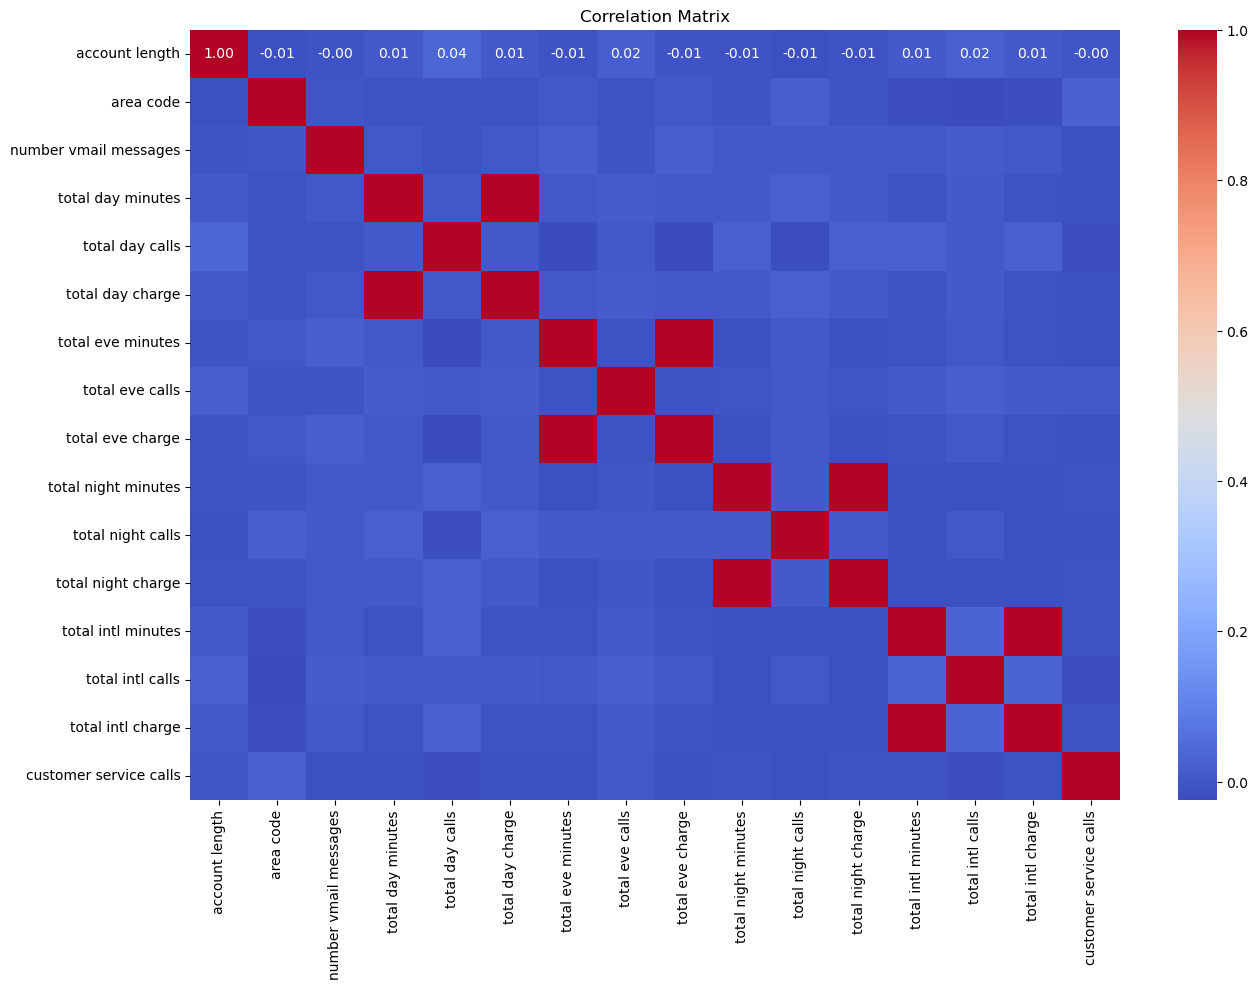

In [60]:
# let us check the correlation between the numeric features
plt.figure(figsize=(15, 10))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# From the above hite map we can see that there is a strong correlation between the following features:
1. `total day minutes` and `total night minutes`
2. `total day calls` and `total night calls`
3. `total eve minutes` and `total night minutes`
4. `total eve calls` and `total night calls`
5. `total intl minutes` and `total intl calls`
6. `total intl minutes` and `total day minutes`
7. `total intl minutes` and `total eve minutes`
8. `total intl minutes` and `total night minutes`
9. `total intl calls` and `total day calls`
10. `total intl calls` and `total eve calls`
11. `total intl calls` and `total night calls`
12. `total intl calls` and `total day minutes`
13. `total intl calls` and `total eve minutes`
14. `total intl calls` and `total night minutes`
15. `total intl calls` and `total day calls`
16. `total intl calls` and `total eve calls`
17. `total intl calls` and `total night calls`
18. `total intl calls` and `total day minutes`


# 3.0 Modelling


# 4.0 Evaluation of Models

# 5.0 Conclusion